In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Using K-means clustering


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visualisation

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

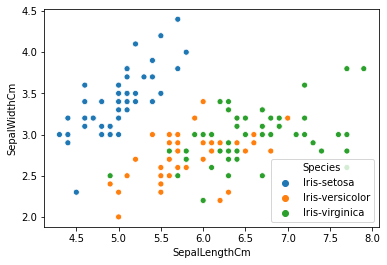

In [5]:
sns.scatterplot('SepalLengthCm','SepalWidthCm',hue='Species',data=df)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

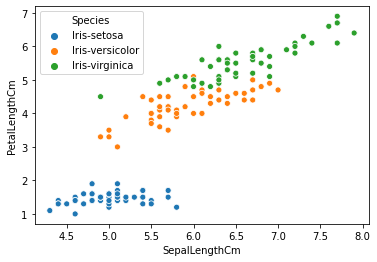

In [6]:
sns.scatterplot('SepalLengthCm','PetalLengthCm',hue='Species',data=df)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

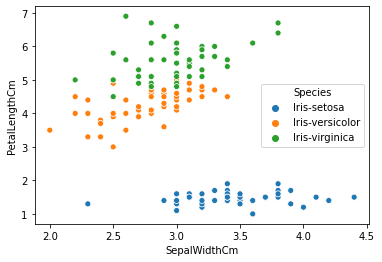

In [7]:
sns.scatterplot('SepalWidthCm','PetalLengthCm',hue='Species',data=df)

In [8]:
df['Species'] = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [11]:
std = StandardScaler()
X_scales = std.fit_transform(X)

In [12]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

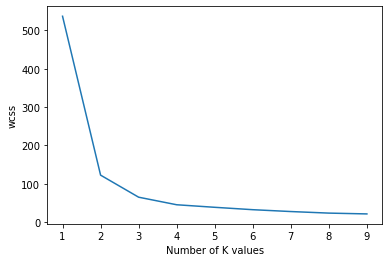

In [13]:
error = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    error.append(model.inertia_)

        
plt.plot(range(1,10),error)
plt.xlabel('Number of K values')
plt.ylabel('wcss')
plt.show()
    

We can easily see that after k=3 our WCSS decreased slowly.

In [19]:
x = df.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

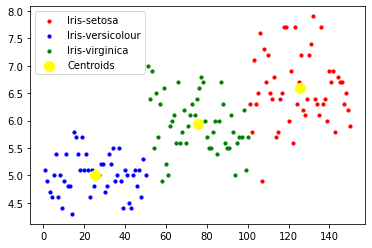

In [23]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 10, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()